In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

df = pd.read_csv('College_Data.csv')
print(df.shape)
df.head()

(777, 19)


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [2]:
df.rename( columns={'Unnamed: 0':'School'}, inplace=True )

In [3]:
df['accept_rate'] = df['Accept']/df['Apps']

In [4]:
df.head()

,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,accept_rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0.742169
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0.880146
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0.768207
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0.836930
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0.756477


In [5]:
cols = list(df.columns)
cols

['School',
 'Private',
 'Apps',
 'Accept',
 'Enroll',
 'Top10perc',
 'Top25perc',
 'F.Undergrad',
 'P.Undergrad',
 'Outstate',
 'Room.Board',
 'Books',
 'Personal',
 'PhD',
 'Terminal',
 'S.F.Ratio',
 'perc.alumni',
 'Expend',
 'Grad.Rate',
 'accept_rate']

In [6]:
cols = [cols[-1]] + cols[:-1]
df = df[cols]
df

,accept_rate,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.742169,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,0.880146,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,0.768207,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,0.836930,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,0.756477,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.689577,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,0.921388,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,0.913209,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,0.229145,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [7]:
df = df.sort_values(by=['accept_rate'])

In [8]:
rx = re.compile(r'Massachusetts\s.*')

In [9]:
df[df.School.str.contains(rx, regex=True, na=False)]

,accept_rate,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
354,0.333801,Massachusetts Institute of Technology,Yes,6411,2140,1078,96,99,4481,28,20100,5975,725,1600,99,99,10.1,35,33541,94
635,0.775919,University of Massachusetts at Dartmouth,No,3347,2597,1006,10,37,4664,1630,6919,4500,500,1250,74,90,15.0,20,7462,56
634,0.859814,University of Massachusetts at Amherst,No,14438,12414,3816,12,39,16282,1940,8566,3897,500,1400,88,92,16.7,15,10276,68


In [10]:
df['total_cost'] = df['Outstate'] + df['Room.Board'] + df['Books'] + df['Personal']

In [11]:
df.head()

,accept_rate,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,...,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,total_cost
459,0.154486,Princeton University,Yes,13218,2042,1153,90,98,4540,146,...,5910,675,1575,91,96,8.4,54,28320,99,28060
250,0.156149,Harvard University,Yes,13865,2165,1606,90,100,6862,320,...,6410,500,1920,97,97,9.9,52,37219,100,27315
775,0.229145,Yale University,Yes,10705,2453,1317,95,99,5217,83,...,6510,630,2115,96,96,5.8,49,40386,99,29095
16,0.230590,Amherst College,Yes,4302,992,418,83,96,1593,5,...,5300,660,1598,93,98,8.4,63,21424,100,27318
70,0.257349,Brown University,Yes,12586,3239,1462,87,95,5643,349,...,5926,720,1100,99,100,7.6,39,20440,97,27274


In [12]:
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]
df

,total_cost,accept_rate,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,...,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
459,28060,0.154486,Princeton University,Yes,13218,2042,1153,90,98,4540,...,19900,5910,675,1575,91,96,8.4,54,28320,99
250,27315,0.156149,Harvard University,Yes,13865,2165,1606,90,100,6862,...,18485,6410,500,1920,97,97,9.9,52,37219,100
775,29095,0.229145,Yale University,Yes,10705,2453,1317,95,99,5217,...,19840,6510,630,2115,96,96,5.8,49,40386,99
16,27318,0.230590,Amherst College,Yes,4302,992,418,83,96,1593,...,19760,5300,660,1598,93,98,8.4,63,21424,100
70,27274,0.257349,Brown University,Yes,12586,3239,1462,87,95,5643,...,19528,5926,720,1100,99,100,7.6,39,20440,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,12322,1.000000,University of Wisconsin-Superior,No,910,910,342,14,53,1434,...,7032,2780,550,1960,75,81,15.2,15,6490,36
368,16573,1.000000,MidAmerica Nazarene College,Yes,331,331,225,15,36,1100,...,6840,3720,1100,4913,33,33,15.4,20,5524,49
355,9502,1.000000,Mayville State University,No,233,233,153,5,12,658,...,4486,2516,600,1900,68,68,15.7,11,6971,51
535,10970,1.000000,Southwest Baptist University,Yes,1093,1093,642,12,32,1770,...,7070,2500,400,1000,52,54,15.9,13,4718,71


In [13]:
df.corr()

,total_cost,accept_rate,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
total_cost,1.000000,-0.283374,0.112415,0.032277,-0.098558,0.561693,0.491246,-0.151784,-0.183334,0.972004,0.773180,0.124729,-0.152988,0.406135,0.438012,-0.543854,0.508310,0.686396,0.552291
accept_rate,-0.283374,1.000000,-0.392555,-0.175196,-0.152174,-0.478675,-0.434672,-0.155654,-0.092287,-0.240951,-0.310302,-0.174073,0.019979,-0.318334,-0.303800,0.109982,-0.132104,-0.408622,-0.286972
Apps,0.112415,-0.392555,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.032277,-0.175196,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,-0.098558,-0.152174,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.561693,-0.478675,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.491246,-0.434672,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,-0.151784,-0.155654,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,-0.183334,-0.092287,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.972004,-0.240951,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290


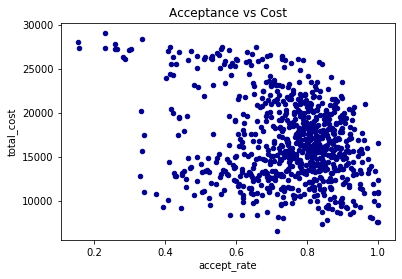

In [32]:
ax1 = df.plot(kind='scatter', x='accept_rate', y='total_cost', title='Acceptance vs Cost',c='DarkBlue')

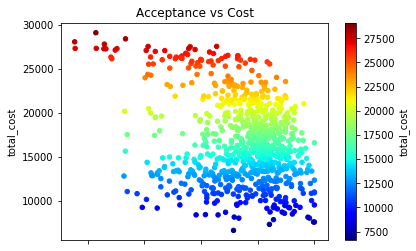

In [42]:
ax2 = df.plot(kind='scatter', x='accept_rate', y='total_cost',  title='Acceptance vs Cost',c='total_cost',colormap='jet')
#https://bids.github.io/colormap/

Text(0.5, 10000, 'test')

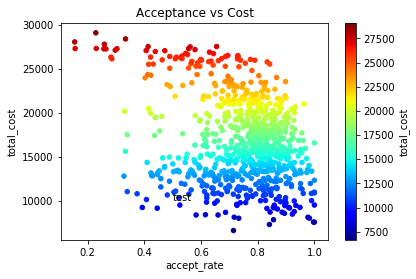

In [47]:
fig, ax3 = plt.subplots()
ax4 = df.plot(kind='scatter', x='accept_rate', y='total_cost',  title='Acceptance vs Cost',c='total_cost',colormap='jet',ax=ax3)
ax3.annotate('test',xy=(.5,10000))